In [9]:
import pandas as pd
df = pd.read_csv("car.csv").drop(columns=["Unnamed: 0"])
print(f"Shape: {df.shape}")
print(df.isnull().sum()) 
df.head()

Shape: (1728, 7)
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


df_encoded = df.apply(le.fit_transform)

df_encoded.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


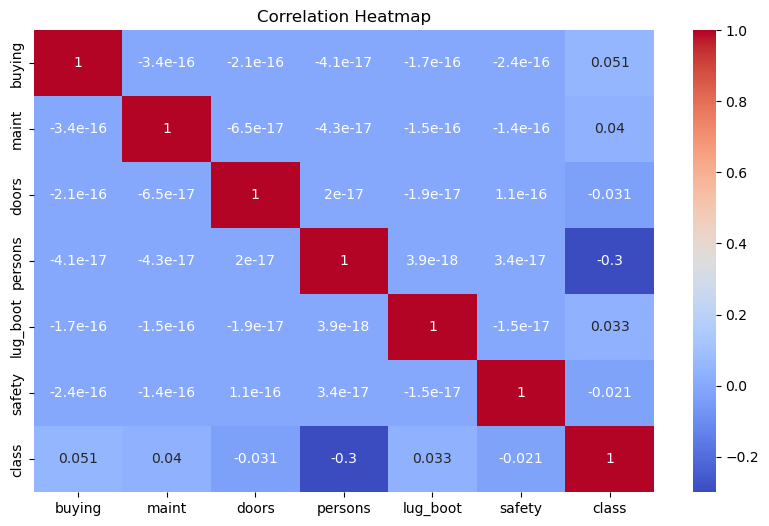

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


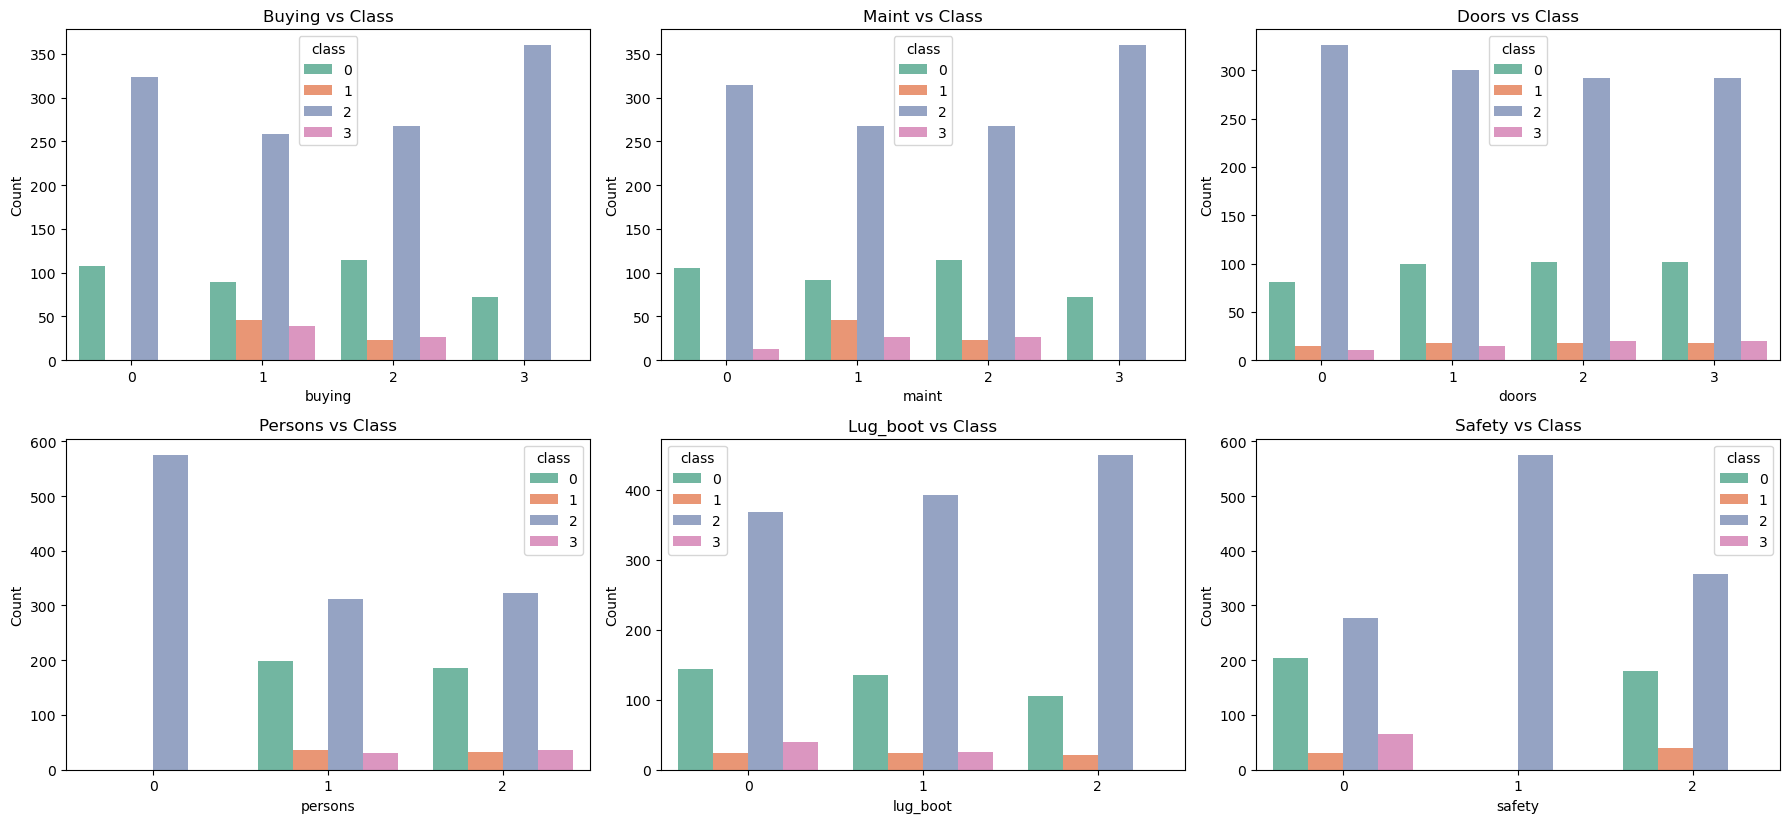

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target vs each feature
features = df_encoded.columns[:-1]  # all except target
target = 'class'

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_encoded, x=feature, hue=target, palette='Set2')
    plt.title(f'{feature.capitalize()} vs Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6589595375722543
Precision (macro): 0.2463095238095238
Recall (macro): 0.26398359395026916

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



C:\Users\vighn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vighn\anaconda3\Lib\site-packag

In [23]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    
    results.append([name, acc, prec, rec, f1])

# Display results as a DataFrame
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(comparison_df.sort_values(by="F1 Score", ascending=False))


C:\Users\vighn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.965318   0.895169  0.952162  0.910739
3        Decision Tree  0.968208   0.881419  0.912071  0.883714
1                  KNN  0.887283   0.777395  0.667016  0.698386
0  Logistic Regression  0.658960   0.246310  0.263984  0.246804
